# Testing package with Iris dataset

## Importing packages

In [16]:
# Import python_som
# Import libraries for plotting results
import matplotlib.pyplot as plt

# Import NumPy and Pandas for storing data
import numpy as np
import seaborn as sns

import python_som

# Import timing tools
import time

## Loading dataset w/ Seaborn

In [17]:
# Load Iris dataset and columns of features and labels
iris = sns.load_dataset("iris")
target = iris.iloc[:, -1].to_numpy()
iris = iris.iloc[:, :-1].to_numpy()
# Transform labels into numeric codes for plotting
tg = np.zeros(len(target), dtype=int)
tg[target == "setosa"] = 0
tg[target == "versicolor"] = 1
tg[target == "virginica"] = 2

## SOM Instantiation

In [18]:
help(python_som.SOM.__init__)

Help on function __init__ in module python_som:

__init__(self, x: int | None, y: int | None, input_len: int, learning_rate: float = 0.5, learning_rate_decay: Callable[[float, int, int], float] = <function _asymptotic_decay at 0x72af5d25b1a0>, neighborhood_radius: float = 1.0, neighborhood_radius_decay: Callable[[float, int, int], float] = <function _asymptotic_decay at 0x72af5d25b1a0>, neighborhood_function: str = 'gaussian', distance_function: Callable[[numpy.ndarray, numpy.ndarray], numpy.ndarray] = <function _euclidean_distance at 0x72af53f94fe0>, cyclic_x: bool = False, cyclic_y: bool = False, random_seed: int | None = None, data: numpy.ndarray | pandas.core.frame.DataFrame | list | None = None) -> None
    Constructor for the self-organizing map class.

    :param x: int or NoneType: X dimension of the self-organizing map, i.e.,
        number of rows of the matrix of weights.
        x should be larger than 0.
        If x is None and 'data' is provided in kwargs, its value will

In [19]:
# Instantiate SOM from  python_som
# Selecting shape automatically (providing dataset for constructor)
# Using default decay and distance functions
# Using gaussian neighborhood function
# Using cyclic arrays in the vertical and horizontal directions
som = python_som.SOM(x=20, y=None, input_len=iris.shape[1], learning_rate=0.5, neighborhood_radius=1.0,
                     neighborhood_function='gaussian', cyclic_x=True, cyclic_y=True, data=iris)

In [20]:
# # Instantiate SOM from  python_som
# # With fixed shape
# # Using default decay and distance functions
# # Using gaussian neighborhood function
# # Not using cyclic arrays
# som = python_som.SOM(x=8, y=8, input_len=iris.shape[1], learning_rate=0.5, neighborhood_radius=1.0,
#                      neighborhood_function='gaussian', cyclic_x=False, cyclic_y=False)

## Weight initialization

In [21]:
help(som.weight_initialization)

Help on method weight_initialization in module python_som:

weight_initialization(mode: str = 'random', **kwargs: numpy.ndarray | pandas.core.frame.DataFrame | list | str | int) -> None method of python_som.SOM instance
    Function for weight initialization of the self-organizing map.

    Calls other methods for each initialization mode.

    :param mode: str: Initialization mode. May be either 'random', 'linear', or 'sample'.
        Note: Each initialization method may require multiple additional arguments in kwargs.
    :param kwargs:
        For 'random' initialization mode, 'sample_mode': str may be provided to determine
        the sampling mode. 'sample_mode' may be either 'standard_normal' (default) or 'uniform'
        For 'random' and 'sample' modes, 'random_seed': int may be provided for the random
        value generator. For 'sample' and 'linear' modes, 'data': array-like must be provided
        for sampling/PCA.



In [22]:
# # Initialize weights of the SOM with random initialization, from uniform distribution
# som.weight_initialization(mode='random', sample_mode='uniform')

In [23]:
# # Initialize weights of the SOM with sampling from dataset
# som.weight_initialization(mode='sample', data=iris)

In [24]:
# Initialize weights of the SOM with linear initialization
som.weight_initialization(mode='linear', data=iris)

## Training

In [25]:
help(som.train)

Help on method train in module python_som:

train(data: numpy.ndarray | pandas.core.frame.DataFrame | list, n_iteration: int | None = None, mode: str = 'random', verbose: bool = False) -> float method of python_som.SOM instance
    Trains the self-organizing map, with the dataset 'data', and a certain number of iterations.

    :param data: array-like: Dataset for training.
    :param n_iteration: int or None: Number of iterations of training.
        If None, defaults to 1000 * len(data) for stepwise training modes,
        or 10 * len(data) for batch training mode.
    :param mode: str: Training mode name. May be either 'random', 'sequential', or 'batch'.
        For 'batch' mode, a much smaller number of iterations is needed,
        but a higher computation power is required for each individual iteration.
    :param verbose: bool: Activate to print useful information to the terminal/console, e.g.,
        the progress of the training process
    :return: float: Quantization error a

In [26]:
# # Training with stepwise algorithm, with random sampling from the dataset
# t_start = time.time()
# q_error = som.train(iris, 1000 * len(iris), mode='random', verbose=False)
# t_end = time.time()
# print("Quantization error:", q_error)
# print("Execution time:", t_end-t_start, "s")

In [27]:
# # Training with stepwise algorithm, with sequential sampling from the dataset
# t_start = time.time()
# q_error = som.train(iris, 1000 * len(iris), mode='sequential', verbose=False)
# t_end = time.time()
# print("Quantization error:", q_error)
# print("Execution time:", t_end-t_start, "s")

In [28]:
# Training with batch algorithm
t_start = time.time()
q_error = som.train(iris, len(iris), mode='batch', verbose=False)
t_end = time.time()
print("Quantization error:", q_error)
print("Execution time:", t_end-t_start, "s")

Quantization error: 0.11333343581048994
Execution time: 6.359957695007324 s


## Plotting U-matrix

In [29]:
help(som.distance_matrix)

Help on method distance_matrix in module python_som:

distance_matrix(normalize: bool = False) -> numpy.ndarray method of python_som.SOM instance
    Calculates U-matrix of the current state of the network,
    i.e., the matrix of distances between each node and its neighbors.
    Has support for cyclic arrays

    :param normalize: bool: Activate to normalize the U-matrix between 0 and 1.
        Defaults to False.
    :return: np.ndarray: U-matrix of the current state of the network.



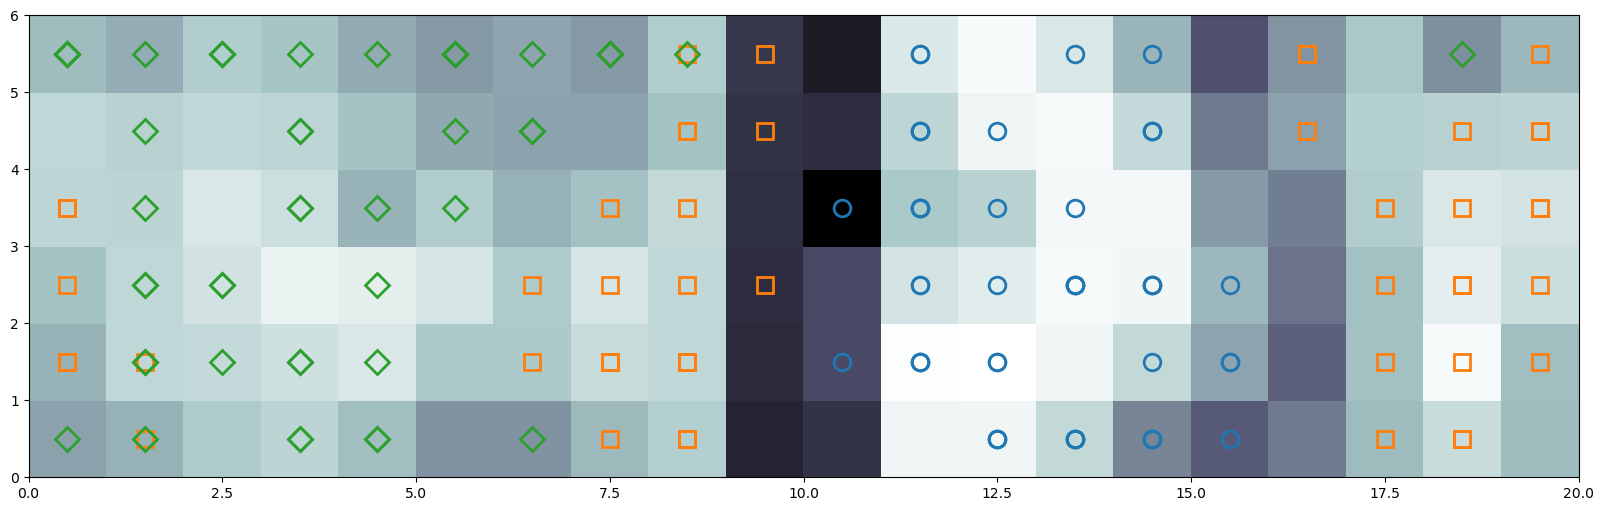

In [30]:
# Calculating distance matrix for plotting
umatrix = som.distance_matrix().T

# Plotting U-matrix with seaborn/matplotlib
plt.figure(figsize=som.get_shape())
plt.pcolor(umatrix, cmap='bone_r')

markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(iris):
    w = som.winner(xx)  # getting the winner
    plt.plot(w[0] + .5, w[1] + .5, markers[tg[cnt]], markerfacecolor='None',
             markeredgecolor=colors[tg[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, som.get_shape()[0], 0, som.get_shape()[1]])
plt.show()
